<a href="https://colab.research.google.com/github/Pavan-pk/Kaggle_Google_stock_price/blob/main/Kaggle_rnn_Google_stock_price_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#Only one colmn, 1st open_cost (1:2 -> col.1 to get np array instead of vector)
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
#(batch_size(total samples), number of timesteps(60 in our case)), 1 how many indicators(in our case 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
#first dim is already taken atuomatically, so only 2nd and 3rd
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0488
Epoch 2/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [============================

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#inversing the scaling on predicted value to compare.
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

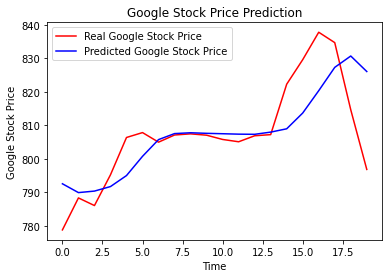

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#for calculating RSME (usual post regression )
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [ ]:
rmse

10.757104686933488